In [41]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler


In [42]:
from sklearn.pipeline import Pipeline
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor, ExtraTreesRegressor, AdaBoostRegressor, BaggingRegressor, HistGradientBoostingRegressor
from xgboost import XGBRegressor
from lightgbm import LGBMRegressor
from sklearn.neural_network import MLPRegressor
from sklearn.linear_model import Ridge, Lasso
from statsmodels.stats.outliers_influence import variance_inflation_factor
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score,accuracy_score

In [43]:
df = pd.read_excel("C:/Users/JDPK/Downloads/Aviation_KPIs_Dataset.xlsx")

In [44]:
df.shape

(200000, 18)

In [45]:
df.head()

,Flight Number,Scheduled Departure Time,Actual Departure Time,Delay (Minutes),Aircraft Utilization (Hours/Day),Turnaround Time (Minutes),Load Factor (%),Fleet Availability (%),Maintenance Downtime (Hours),Fuel Efficiency (ASK),Revenue (USD),Operating Cost (USD),Net Profit Margin (%),Ancillary Revenue (USD),Debt-to-Equity Ratio,Revenue per ASK,Cost per ASK,Profit (USD)
0,FL885,2024-05-20 11:51:21.328,2024-07-10 02:38:53.731,50,12.36,115,79.18,96.24,9.21,4.15,10953.75,27847.59,17.90,1058.68,2.46,2639.46,6710.26,-16893.84
1,FL930,2024-01-23 06:56:22.686,2024-07-07 02:53:44.150,27,14.53,83,98.59,80.49,1.55,3.93,31597.25,1564.41,7.70,2941.32,2.89,8040.01,398.07,30032.84
2,FL478,2024-05-30 09:18:38.578,2024-12-05 01:00:54.473,108,10.73,87,67.44,97.90,2.06,4.26,13700.27,30494.88,5.84,1920.45,1.34,3216.03,7158.42,-16794.61
3,FL637,2024-08-15 05:21:46.814,2024-09-21 13:23:41.615,64,15.10,99,69.01,80.17,6.85,4.13,39913.01,13444.09,24.09,3167.79,0.60,9664.17,3255.23,26468.92
4,FL318,2024-07-25 15:29:58.467,2024-03-21 15:05:54.375,30,13.46,114,50.36,82.23,7.30,4.97,11531.48,34668.98,7.18,619.80,0.84,2320.22,6975.65,-23137.50


In [46]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200000 entries, 0 to 199999
Data columns (total 18 columns):
 #   Column                            Non-Null Count   Dtype         
---  ------                            --------------   -----         
 0   Flight Number                     200000 non-null  object        
 1   Scheduled Departure Time          200000 non-null  datetime64[ns]
 2   Actual Departure Time             200000 non-null  datetime64[ns]
 3   Delay (Minutes)                   200000 non-null  int64         
 4   Aircraft Utilization (Hours/Day)  200000 non-null  float64       
 5   Turnaround Time (Minutes)         200000 non-null  int64         
 6   Load Factor (%)                   200000 non-null  float64       
 7   Fleet Availability (%)            200000 non-null  float64       
 8   Maintenance Downtime (Hours)      200000 non-null  float64       
 9   Fuel Efficiency (ASK)             200000 non-null  float64       
 10  Revenue (USD)                   

In [47]:
df.describe()

,Scheduled Departure Time,Actual Departure Time,Delay (Minutes),Aircraft Utilization (Hours/Day),Turnaround Time (Minutes),Load Factor (%),Fleet Availability (%),Maintenance Downtime (Hours),Fuel Efficiency (ASK),Revenue (USD),Operating Cost (USD),Net Profit Margin (%),Ancillary Revenue (USD),Debt-to-Equity Ratio,Revenue per ASK,Cost per ASK,Profit (USD)
count,200000,200000,200000.00000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000
mean,2024-06-29 07:21:27.047897856,2024-06-29 08:55:04.198966016,59.35885,12.003438,74.451680,74.997178,85.001378,5.503103,3.496959,25571.448338,20429.003323,15.011169,2550.025537,1.752445,7818.578193,6245.613443,5142.445015
min,2024-01-01 00:01:53.341000,2024-01-01 00:03:33.981000,0.00000,8.000000,30.000000,50.000000,70.000000,1.000000,2.000000,1000.060000,800.030000,5.000000,100.020000,0.500000,203.110000,164.830000,-38973.960000
25%,2024-03-30 22:12:47.147000064,2024-03-30 15:40:28.572750080,29.00000,9.990000,52.000000,62.500000,77.480000,3.250000,2.750000,13297.042500,10609.022500,10.010000,1325.570000,1.130000,3812.782500,3041.547500,-7983.690000
50%,2024-06-29 10:33:27.125000192,2024-06-28 20:10:25.013499904,59.00000,12.010000,74.000000,74.960000,85.000000,5.500000,3.490000,25566.300000,20410.885000,15.000000,2544.210000,1.750000,7315.460000,5834.705000,5216.975000
75%,2024-09-27 09:33:27.652499968,2024-09-28 03:54:08.405749760,89.00000,14.010000,97.000000,87.530000,92.530000,7.760000,4.250000,37860.402500,30245.907500,20.010000,3776.387500,2.370000,10909.272500,8715.670000,18269.647500
max,2024-12-27 05:14:38.598000,2024-12-27 05:07:36.226000,119.00000,16.000000,119.000000,100.000000,100.000000,10.000000,5.000000,49999.950000,39999.840000,25.000000,5000.000000,3.000000,24999.340000,19928.340000,49054.690000
std,NaN,NaN,34.67602,2.311966,25.977826,14.439393,8.672413,2.601257,0.865309,14158.512116,11316.410641,5.778340,1414.291993,0.720194,4947.028923,3957.358310,18123.595784


In [48]:
df.isnull().sum()

Flight Number                       0
Scheduled Departure Time            0
Actual Departure Time               0
Delay (Minutes)                     0
Aircraft Utilization (Hours/Day)    0
Turnaround Time (Minutes)           0
Load Factor (%)                     0
Fleet Availability (%)              0
Maintenance Downtime (Hours)        0
Fuel Efficiency (ASK)               0
Revenue (USD)                       0
Operating Cost (USD)                0
Net Profit Margin (%)               0
Ancillary Revenue (USD)             0
Debt-to-Equity Ratio                0
Revenue per ASK                     0
Cost per ASK                        0
Profit (USD)                        0
dtype: int64

In [49]:
df.duplicated().sum()

np.int64(0)

In [50]:
df["Departure Month"] = df["Scheduled Departure Time"].dt.month

In [51]:
columns_to_drop = [
    "Flight Number",
    "Scheduled Departure Time",
    "Actual Departure Time",
    "Net Profit Margin (%)",
    "Revenue per ASK",
    "Cost per ASK"
    ]

data = df.drop(columns=columns_to_drop)

In [52]:
data.head()

,Delay (Minutes),Aircraft Utilization (Hours/Day),Turnaround Time (Minutes),Load Factor (%),Fleet Availability (%),Maintenance Downtime (Hours),Fuel Efficiency (ASK),Revenue (USD),Operating Cost (USD),Ancillary Revenue (USD),Debt-to-Equity Ratio,Profit (USD),Departure Month
0,50,12.36,115,79.18,96.24,9.21,4.15,10953.75,27847.59,1058.68,2.46,-16893.84,5
1,27,14.53,83,98.59,80.49,1.55,3.93,31597.25,1564.41,2941.32,2.89,30032.84,1
2,108,10.73,87,67.44,97.90,2.06,4.26,13700.27,30494.88,1920.45,1.34,-16794.61,5
3,64,15.10,99,69.01,80.17,6.85,4.13,39913.01,13444.09,3167.79,0.60,26468.92,8
4,30,13.46,114,50.36,82.23,7.30,4.97,11531.48,34668.98,619.80,0.84,-23137.50,7


In [53]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200000 entries, 0 to 199999
Data columns (total 13 columns):
 #   Column                            Non-Null Count   Dtype  
---  ------                            --------------   -----  
 0   Delay (Minutes)                   200000 non-null  int64  
 1   Aircraft Utilization (Hours/Day)  200000 non-null  float64
 2   Turnaround Time (Minutes)         200000 non-null  int64  
 3   Load Factor (%)                   200000 non-null  float64
 4   Fleet Availability (%)            200000 non-null  float64
 5   Maintenance Downtime (Hours)      200000 non-null  float64
 6   Fuel Efficiency (ASK)             200000 non-null  float64
 7   Revenue (USD)                     200000 non-null  float64
 8   Operating Cost (USD)              200000 non-null  float64
 9   Ancillary Revenue (USD)           200000 non-null  float64
 10  Debt-to-Equity Ratio              200000 non-null  float64
 11  Profit (USD)                      200000 non-null  f

# ✈️ Data Cleaning & Feature Engineering

## ✅ Verification of Dropped Columns
We have removed the following columns for better model performance:  

| Column                        | Reason for Removal |
|-------------------------------|--------------------|
| **Flight Number**             | Irrelevant for prediction |
| **Scheduled Departure Time**  | Converted to `Departure Month`, so no need for timestamp |
| **Actual Departure Time**     | Avoids data leakage |
| **Net Profit Margin (%)**     | Redundant since we have `Profit (USD)` |
| **Revenue per ASK** & **Cost per ASK** | Already covered by `Revenue (USD)` and `Operating Cost (USD)` |

✅ **Conclusion**: Dropping these columns ensures a cleaner dataset with no redundancy.  

---

## ✅ Verification of Added Feature (`Departure Month`)
We added a **new feature** for better seasonality insights:  

✅ Extracted from Scheduled Departure Time, avoiding data leakage.  
✅ Helps in understanding seasonality trends and real-world availability.  
✅ Stored as int32 to optimize memory usage.  


In [54]:
# Selecting numerical columns
num_cols = data.select_dtypes(include=['int64', 'float64']).columns.tolist()

In [55]:
# Display numerical columns
print("Numerical Columns:", num_cols)

Numerical Columns: ['Delay (Minutes)', 'Aircraft Utilization (Hours/Day)', 'Turnaround Time (Minutes)', 'Load Factor (%)', 'Fleet Availability (%)', 'Maintenance Downtime (Hours)', 'Fuel Efficiency (ASK)', 'Revenue (USD)', 'Operating Cost (USD)', 'Ancillary Revenue (USD)', 'Debt-to-Equity Ratio', 'Profit (USD)']


In [56]:
data["Departure Month"] = data["Departure Month"].astype("int64")


In [57]:

def detect_outliers_iqr(data, column):
    Q1 = data[column].quantile(0.25)
    Q3 = data[column].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    outliers = data[(data[column] < lower_bound) | (data[column] > upper_bound)]
    return outliers.shape[0]

# Detect number of outliers in each column
outlier_counts = {col: detect_outliers_iqr(df, col) for col in num_cols}

# Print results
for col, count in outlier_counts.items():
    print(f"{col}: {count} outliers")


Delay (Minutes): 0 outliers
Aircraft Utilization (Hours/Day): 0 outliers
Turnaround Time (Minutes): 0 outliers
Load Factor (%): 0 outliers
Fleet Availability (%): 0 outliers
Maintenance Downtime (Hours): 0 outliers
Fuel Efficiency (ASK): 0 outliers
Revenue (USD): 0 outliers
Operating Cost (USD): 0 outliers
Ancillary Revenue (USD): 0 outliers
Debt-to-Equity Ratio: 0 outliers
Profit (USD): 0 outliers


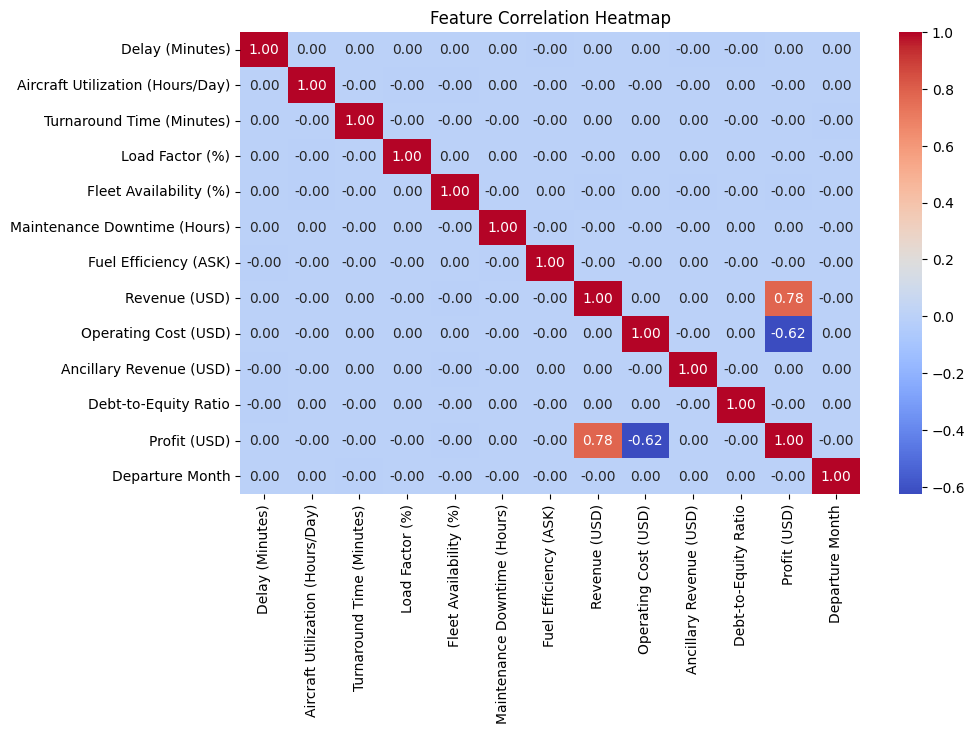

In [58]:
plt.figure(figsize=(10, 6))
sns.heatmap(data.corr(), annot=True, cmap="coolwarm", fmt=".2f")
plt.title("Feature Correlation Heatmap")
plt.show()

In [59]:
from statsmodels.stats.outliers_influence import variance_inflation_factor

In [60]:
# Calculating VIF
vif_data = pd.DataFrame()
vif_data["Feature"] = num_cols
vif_data["VIF"] = [variance_inflation_factor(data[num_cols].values, i) for i in range(len(num_cols))]

# Displaying VIF values
print(vif_data)

c:\Program Files\python 3.9\.venv\lib\site-packages\statsmodels\stats\outliers_influence.py:197: RuntimeWarning: divide by zero encountered in scalar divide
  vif = 1. / (1. - r_squared_i)
c:\Program Files\python 3.9\.venv\lib\site-packages\statsmodels\stats\outliers_influence.py:197: RuntimeWarning: divide by zero encountered in scalar divide
  vif = 1. / (1. - r_squared_i)


                             Feature        VIF
0                    Delay (Minutes)   3.873294
1   Aircraft Utilization (Hours/Day)  24.113659
2          Turnaround Time (Minutes)   8.825306
3                    Load Factor (%)  24.191838
4             Fleet Availability (%)  50.095596
5       Maintenance Downtime (Hours)   5.352386
6              Fuel Efficiency (ASK)  15.892340
7                      Revenue (USD)        inf
8               Operating Cost (USD)        inf
9            Ancillary Revenue (USD)   4.179075
10              Debt-to-Equity Ratio   6.714142
11                      Profit (USD)        inf


c:\Program Files\python 3.9\.venv\lib\site-packages\statsmodels\stats\outliers_influence.py:197: RuntimeWarning: divide by zero encountered in scalar divide
  vif = 1. / (1. - r_squared_i)


In [61]:
# Select numerical columns (excluding target 'Profit (USD)')
num_cols = [col for col in data.select_dtypes(include=['number']).columns if col != "Profit (USD)"]


In [62]:
# Compute VIF again
vif_data = pd.DataFrame()
vif_data["Feature"] = num_cols
vif_data["VIF"] = [variance_inflation_factor(data[num_cols].values, i) for i in range(len(num_cols))]

# Display results
print(vif_data)

                             Feature        VIF
0                    Delay (Minutes)   3.874617
1   Aircraft Utilization (Hours/Day)  24.186049
2          Turnaround Time (Minutes)   8.830933
3                    Load Factor (%)  24.255727
4             Fleet Availability (%)  50.918461
5       Maintenance Downtime (Hours)   5.354312
6              Fuel Efficiency (ASK)  15.915879
7                      Revenue (USD)   4.189731
8               Operating Cost (USD)   4.193423
9            Ancillary Revenue (USD)   4.180549
10              Debt-to-Equity Ratio   6.717873
11                   Departure Month   4.472712


In [63]:
# 🔹 Step 2: Feature Scaling (Standardization)
scaler = StandardScaler()
X = data.drop(columns=["Profit (USD)"])  # Assuming 'Profit' is the target variable
y = data["Profit (USD)"]

X_scaled = scaler.fit_transform(X)

In [64]:
# 🔹 Step 3: Reduce Dimensionality (Optional PCA)
pca = PCA(n_components=0.95)  # Preserve 95% variance
X_pca = pca.fit_transform(X_scaled)

In [65]:
# 🔹 Step 4: Train-Test Split
X_train, X_test, y_train, y_test = train_test_split(X_pca, y, test_size=0.2, random_state=42)


In [ ]:
# Set random seed for reproducibility
RANDOM_SEED = 42
np.random.seed(RANDOM_SEED)

# 🔹 Step 5: Define Models with Regularization
models = {
    "RandomForest": RandomForestRegressor(n_estimators=100, random_state=RANDOM_SEED),
    "GradientBoosting": GradientBoostingRegressor(random_state=RANDOM_SEED),
    "ExtraTrees": ExtraTreesRegressor(random_state=RANDOM_SEED),
    "AdaBoost": AdaBoostRegressor(random_state=RANDOM_SEED),
    "HistGradientBoosting": HistGradientBoostingRegressor(random_state=RANDOM_SEED),
    "Bagging": BaggingRegressor(random_state=RANDOM_SEED),
    "XGBoost": XGBRegressor(random_state=RANDOM_SEED),
    "LGBM": LGBMRegressor(random_state=RANDOM_SEED),
    "MLPRegressor": MLPRegressor(hidden_layer_sizes=(100, 100), max_iter=500, random_state=RANDOM_SEED)
}

# 🔹 Step 6: Train Models & Evaluate Performance
results = []

# Train-Test Split
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=RANDOM_SEED)

    for name, model in models.items():
        print(f"\n🔹 Training {name} Model...")

        # Apply StandardScaler only for MLPRegressor
        if name == "MLPRegressor":
            pipeline = Pipeline([("scaler", StandardScaler()), ("model", model)])
        else:
            pipeline = model  # Directly use model for tree-based ones

        # Cross-Validation (5-Fold)
        scores = cross_val_score(pipeline, X_train, y_train, cv=3, scoring='r2', n_jobs=-1)
        
        # Train Model
        pipeline.fit(X_train, y_train)

        # Predictions
        y_pred = pipeline.predict(X_test)

    # Compute Metrics
    mae = mean_absolute_error(y_test, y_pred)
    mse = mean_squared_error(y_test, y_pred)
    rmse = np.sqrt(mse)
    r2 = r2_score(y_test, y_pred)

    # Append results
    results.append({
        "Model": name,
        "MAE": mae,
        "MSE": mse,
        "RMSE": rmse,
        "R²": r2,
        "CV R² Mean": scores.mean(),
    })
    
    print(f"✅ {name} Evaluated")
    print(f"MAE={mae:.5f}, MSE={mse:.5f}, RMSE={rmse:.5f}, R2={r2:.5f}, CV R² Mean={scores.mean():.5f}")

# 🔹 Step 7: Display Results
results_df = pd.DataFrame(results)
results_df.sort_values(by="R²", ascending=False, inplace=True)  # Sort by best R² score
print("\n📊 Model Performance Summary:")
print(results_df)


🔹 Training RandomForest Model...
✅ RandomForest Evaluated
MAE=39.26598, MSE=2584.31045, RMSE=50.83611, R2=0.99999, CV R² Mean=0.99999

🔹 Training GradientBoosting Model...
✅ GradientBoosting Evaluated
MAE=369.62550, MSE=223982.88278, RMSE=473.26830, R2=0.99931, CV R² Mean=0.99926

🔹 Training ExtraTrees Model...
✅ ExtraTrees Evaluated
MAE=21.21715, MSE=752.44454, RMSE=27.43072, R2=1.00000, CV R² Mean=1.00000

🔹 Training AdaBoost Model...
✅ AdaBoost Evaluated
MAE=2743.59051, MSE=11193388.29454, RMSE=3345.65215, R2=0.96567, CV R² Mean=0.96491

🔹 Training HistGradientBoosting Model...
✅ HistGradientBoosting Evaluated
MAE=195.19980, MSE=60500.62579, RMSE=245.96875, R2=0.99981, CV R² Mean=0.99981

🔹 Training Bagging Model...
✅ Bagging Evaluated
MAE=63.41663, MSE=6559.44863, RMSE=80.99042, R2=0.99998, CV R² Mean=0.99997

🔹 Training XGBoost Model...
✅ XGBoost Evaluated
MAE=176.37478, MSE=53657.45216, RMSE=231.64078, R2=0.99984, CV R² Mean=0.99982

🔹 Training LGBM Model...
[LightGBM] [Warning]

In [67]:
X.columns

Index(['Delay (Minutes)', 'Aircraft Utilization (Hours/Day)',
       'Turnaround Time (Minutes)', 'Load Factor (%)',
       'Fleet Availability (%)', 'Maintenance Downtime (Hours)',
       'Fuel Efficiency (ASK)', 'Revenue (USD)', 'Operating Cost (USD)',
       'Ancillary Revenue (USD)', 'Debt-to-Equity Ratio', 'Departure Month'],
      dtype='object')

In [70]:
import joblib
import pickle

# Define the best models (update this based on actual model performance)
best_models = {
    "MLPRegressor": models["MLPRegressor"],
    "ExtraTreesRegressor": models["ExtraTrees"],
    "RandomForestRegressor": models["RandomForest"]
}

# Save models with their respective preprocessing steps
for name, model in best_models.items():
    print(f"\n💾 Saving {name} model...")

    # Apply StandardScaler for MLPRegressor
    if name == "MLPRegressor":
        pipeline = Pipeline([("scaler", StandardScaler()), ("model", model)])
    else:
        pipeline = model  # Tree-based models don't need scaling

    # Save the pipeline/model
    joblib.dump(pipeline, f"{name}_pipeline.pkl")
    print(f"✅ {name} pipeline saved successfully!")

# Save Scaler (Only if it was used)
if any(name == "MLPRegressor" for name in best_models.keys()):
    joblib.dump(StandardScaler(), "scaler.pkl")
    print("✅ Scaler saved successfully!")

# Save PCA (Only if it was used)
if 'pca' in globals():
    joblib.dump(pca, "pca.pkl")
    print("✅ PCA model saved successfully!")

# Save Original Feature Column Names (before PCA)
original_feature_columns = list(X.columns)
with open("original_feature_columns.pkl", "wb") as f:
    pickle.dump(original_feature_columns, f)
print("✅ Original feature columns saved successfully!")

# Save Transformed Feature Column Count (after PCA, if applied)
if 'X_pca' in globals():
    pca_feature_count = X_pca.shape[1]  # Number of components used in PCA
    with open("pca_feature_count.pkl", "wb") as f:
        pickle.dump(pca_feature_count, f)
    print(f"✅ PCA feature count ({pca_feature_count} components) saved successfully!")



💾 Saving MLPRegressor model...
✅ MLPRegressor pipeline saved successfully!

💾 Saving ExtraTreesRegressor model...
✅ ExtraTreesRegressor pipeline saved successfully!

💾 Saving RandomForestRegressor model...
✅ RandomForestRegressor pipeline saved successfully!
✅ Scaler saved successfully!
✅ PCA model saved successfully!
✅ Original feature columns saved successfully!
✅ PCA feature count (12 components) saved successfully!
